In [13]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
import numpy as np
import cv2
%matplotlib inline
input_dir_path='mpii_human_pose_v1\\input_images\\'
target_img_height=480
target_img_width=640

In [14]:
raw_datas= open('train_data\\data.json').readlines()

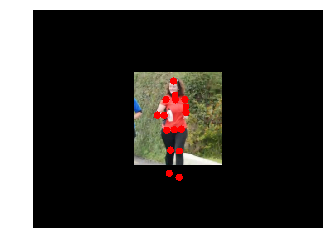

In [15]:
data=json.loads(raw_datas[5000].strip())      #讀標記資料第?筆
img = cv2.imread(input_dir_path+data['filename']) #讀圖檔
joints_pos=data['joint_pos']               #讀關節點資料
original_img_height, original_img_width, channels = img.shape        #獲得圖片資訊

ratio_resize_X=float(target_img_width)/float(original_img_width)
ratio_resize_Y=float(target_img_height)/float(original_img_height)

original_data_scale=data['scale']
original_data_objpos=data['objpos']
                                                                    #如果原圖比預期還要大
if (original_img_height>target_img_height)or(original_img_width>target_img_width):
    ratio_resize=min(ratio_resize_X,ratio_resize_Y)
    img=cv2.resize(img,(0,0),fx=ratio_resize,fy=ratio_resize)
    original_data_objpos[0]=original_data_objpos[0]*ratio_resize
    original_data_objpos[1]=original_data_objpos[1]*ratio_resize
    original_data_scale=original_data_scale*ratio_resize
    original_img_height, original_img_width, channels = img.shape   #重新獲得圖片資訊
    for joint in joints_pos:
        joints_pos[str(joint)][0]=joints_pos[str(joint)][0]*ratio_resize
        joints_pos[str(joint)][1]=joints_pos[str(joint)][1]*ratio_resize
                                                               #算bounding box的位置
side=original_data_scale*200*1.1 
left_top_X=int(original_data_objpos[0]-(side/2))
left_top_Y=int(original_data_objpos[1]-(side/2))
right_down_X=min(original_img_width,left_top_X+int(side))
right_down_Y=min(original_img_height,left_top_Y+int(side))
left_top_X=max(0,left_top_X)
left_top_Y=max(0,left_top_Y)

new_side_width=right_down_X-left_top_X
new_side_height=right_down_Y-left_top_Y

crop_img=img[left_top_Y:right_down_Y,left_top_X:right_down_X]   #切割bound box的範圍

                                                                    #padding
left_padding=int(target_img_width/2-new_side_width/2)
top_padding=int(target_img_height/2-new_side_height/2)
right_padding=int(target_img_width-left_padding-new_side_width)
bottom_padding=int(target_img_height-top_padding-new_side_height)

padding_crop_img= cv2.copyMakeBorder(
    crop_img,top=top_padding,bottom=bottom_padding
    ,left=left_padding,right=right_padding
    ,borderType=cv2.BORDER_CONSTANT,value=[0,0,0])

for joint in joints_pos:
    x=int(joints_pos[str(joint)][0]-left_top_X+left_padding)
    y=int(joints_pos[str(joint)][1]-left_top_Y+top_padding)
    cv2.circle(padding_crop_img,(x,y), 8, (0,0,255), -1)
cv2.rectangle(img,(left_top_X,left_top_Y),(right_down_X,right_down_Y),(0,255,255),5)
plt.axis("off")
plt.imshow(cv2.cvtColor(padding_crop_img, cv2.COLOR_BGR2RGB))
plt.show()